Steps for data mining workflow:

1. Getting the data ready
2. Choose the right estimator/algorithm for our problems.
3. Fit the model/algorithm and use it to make predictions on our data.
4. Evaluating a model
5. Improve a model
6. Save and load a trained model

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder # turns into numbers
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(333)

# The data is read by pandas

In [38]:
heart_disease = pd.read_csv("Heart_Disease_Prediction.csv")
heart_disease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Observing if there are any missing values & how many columns can be turned to categorical columns

In [39]:
# Observing the data so the model becomes accurately trained
heart_disease["Chest pain type"].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [40]:
heart_disease["FBS over 120"].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

In [41]:
heart_disease["EKG results"].value_counts()

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [42]:
heart_disease["Exercise angina"].value_counts()

0    181
1     89
Name: Exercise angina, dtype: int64

In [43]:
heart_disease["Slope of ST"].value_counts()

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [44]:
heart_disease["Number of vessels fluro"].value_counts()

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [45]:
heart_disease["Thallium"].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [46]:
heart_disease["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [47]:
heart_disease.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# Columns above need to be turned to categorical, but let's split to x & y first

In [48]:
x = heart_disease.drop("Heart Disease", axis=1)
y = heart_disease["Heart Disease"]

# Turning columns to categorical to produce better results

In [49]:
# turns x, y to categorica columns on categorical_features, remainder passthrough
one_hot = OneHotEncoder()
categorical_features_x = ["Chest pain type", 
                        "FBS over 120", 
                        "EKG results",
                       "Exercise angina",
                       "Slope of ST",
                       "Number of vessels fluro",
                       "Thallium",
                       "Sex"]
transformer_x = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features_x)],
                               remainder="passthrough")
transformed_x = transformer_x.fit_transform(x)

y = pd.DataFrame(y)
categorical_features_y = ["Heart Disease"]
transformer_y = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features_y)],
                                 remainder="passthrough")
transformed_y = transformer_y.fit_transform(y)

pd.DataFrame(transformed_x), pd.DataFrame(transformed_y)

(      0    1    2    3    4    5    6    7    8    9   ...   18   19   20  \
 0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  0.0  0.0   
 1    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  1.0   
 2    0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
 3    0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
 4    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 265  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
 266  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
 267  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  0.0  0.0   
 268  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
 269  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   
 
       21   22    23     24     25     26   27  
 0    0.0  1.

# Split into training and test set

In [50]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, 
                                                    transformed_y, 
                                                    test_size=0.2)

# We are told to use 3 data mining techniques and 3 performance metrics so training and evaluating with the first data mining technique and evaluating with 3 performance metrics

First classifier used: RandomForest

In [51]:
np.random.seed(333)
# Training Classifier
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)

# Predicting values of y after prediction
y_preds = clf1.predict(x_test)

acc1 = accuracy_score(y_test, y_preds)
prec1 = precision_score(y_test, y_preds, average='micro')
recall1 = recall_score(y_test, y_preds, average='micro')
print(f"Accuracy: {acc1 * 100:.2f}%")
print(f"Precision: {prec1 * 100:.2f}%")
print(f"Recall: {recall1 * 100:.2f}%")

Accuracy: 87.04%
Precision: 87.04%
Recall: 87.04%


# Training and evaluating with the second data mining technique and evaluating with 3 performance metrics

Second classifier: KNN (K Nearest Neighbors)

In [52]:
np.random.seed(333)
# Training Classifier
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf2.fit(x_train, y_train)

# Predicting values of y after prediction
y_preds = clf2.predict(x_test)

acc2 = accuracy_score(y_test, y_preds)
prec2 = precision_score(y_test, y_preds, average='micro')
recall2 = recall_score(y_test, y_preds, average='micro')
print(f"Accuracy: { acc2* 100:.2f}%")
print(f"Precision: {prec2 * 100:.2f}%")
print(f"Recall: {recall2 * 100:.2f}%")

Accuracy: 66.67%
Precision: 66.67%
Recall: 66.67%


# Training and evaluating with the third data mining technique and evaluating with 3 performance metrics
Third classifier: Decision Tree

In [53]:
clf3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf3.fit(x_train, y_train)

# Predicting values of y after prediction
y_preds = clf3.predict(x_test)

acc3 = accuracy_score(y_test, y_preds)
prec3 = precision_score(y_test, y_preds, average='micro')
recall3 = recall_score(y_test, y_preds, average='micro')
print(f"Accuracy: {acc3 * 100:.2f}%")
print(f"Precision: {prec3 * 100:.2f}%")
print(f"Recall: {recall3 * 100:.2f}%")

Accuracy: 66.67%
Precision: 66.67%
Recall: 66.67%


# Adding a graph to visualize the performance metrics with each classifier

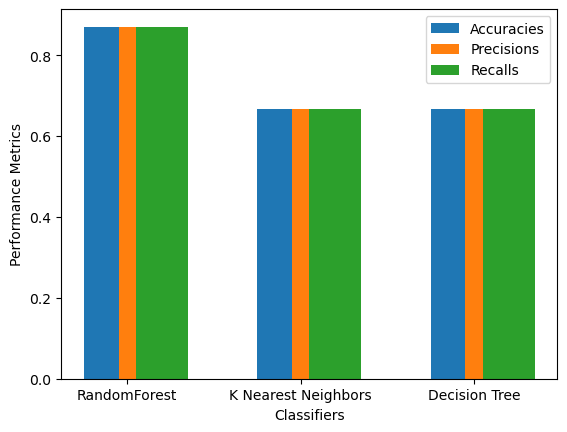

In [54]:
classifiers = ["RandomForest", "K Nearest Neighbors", "Decision Tree"]
accuracies = [acc1, acc2, acc3]
precisions = [prec1, prec2, prec3]
recalls = [recall1, recall2, recall3]

xpos = np.arange(len(classifiers))
plt.xticks(xpos, classifiers)
plt.xlabel("Classifiers")
plt.ylabel("Performance Metrics")
plt.bar(xpos-0.1, accuracies, width=0.3, label="Accuracies")
plt.bar(xpos+0.1, precisions, width=0.3, label="Precisions")
plt.bar(xpos+0.1+0.1, recalls, width=0.3, label="Recalls")
plt.legend()

# The graph shows that the RandomForest performed the best after the model was trained to predict whether the patient has heart disease or not based on certain readings.

# We can tune the hyperparameters to improve the classifiers:

In [55]:
np.random.seed(333)
# Random Forest:
# Training Classifier
sumAcc1 = 0
sumPrec1 = 0
sumRecalll = 0
count = 0
for i in range(10, 110, 10):
    clf1 = RandomForestClassifier(n_estimators=i)
    clf1.fit(x_train, y_train)

    # Predicting values of y after prediction
    y_preds = clf1.predict(x_test)

    acc1 = accuracy_score(y_test, y_preds)
    prec1 = precision_score(y_test, y_preds, average='micro')
    recall1 = recall_score(y_test, y_preds, average='micro')
    
    sumAcc1 += acc1
    sumPrec1 += prec1
    sumRecalll += recall1
    count += 1
print("Random Forest: ")
print(f"Accuracy: {(sumAcc1 / count) * 100:.2f}%")
print(f"Precision: {(sumPrec1 / count) * 100:.2f}%")
print(f"Recall: {(sumRecalll / count) * 100:.2f}%\n")


# K Nearest Neighbors:
# Training Classifier
sumAcc2 = 0
sumPrec2 = 0
sumRecall2 = 0
count = 0
for i in range(5, 50, 5):
    clf2 = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    clf2.fit(x_train, y_train)

    # Predicting values of y after prediction
    y_preds = clf2.predict(x_test)

    acc2 = accuracy_score(y_test, y_preds)
    prec2 = precision_score(y_test, y_preds, average='micro')
    recall2 = recall_score(y_test, y_preds, average='micro')
    
    count+=1
    sumAcc2 += acc2
    sumPrec2 += prec2
    sumRecall2 += recall2
    
print("K Nearest Neighbors:")
print(f"Accuracy: { (sumAcc2 / count)* 100:.2f}%")
print(f"Precision: {(sumPrec2 / count) * 100:.2f}%")
print(f"Recall: {(sumRecall2 / count) * 100:.2f}%\n")

# Descision Tree:
sumAcc3 = 0
sumPrec3 = 0
sumRecall3 = 0
count = 0
for i in range(5, 50, 5):
    clf3 = DecisionTreeClassifier(criterion = 'entropy', random_state = i)
    clf3.fit(x_train, y_train)

    # Predicting values of y after prediction
    y_preds = clf3.predict(x_test)

    acc3 = accuracy_score(y_test, y_preds)
    prec3 = precision_score(y_test, y_preds, average='micro')
    recall3 = recall_score(y_test, y_preds, average='micro')
    
    count+=1
    sumAcc3 += acc3
    sumPrec3 += prec3
    sumRecall3 += recall3
    
print("Decision Tree: ")
print(f"Accuracy: {(sumAcc3 / count) * 100:.2f}%")
print(f"Precision: {(sumPrec3 / count) * 100:.2f}%")
print(f"Recall: {(sumRecall3 / count) * 100:.2f}%\n")

Random Forest: 
Accuracy: 85.19%
Precision: 85.67%
Recall: 85.19%

K Nearest Neighbors:
Accuracy: 65.64%
Precision: 68.72%
Recall: 65.64%

Decision Tree: 
Accuracy: 63.37%
Precision: 63.37%
Recall: 63.37%



# After a lot of experimentations, Random Forest always gets the upper hand.